In [1]:
import tarfile
import tempfile
from pathlib import Path

import matplotlib.pyplot as plt

from ugradiolab.data import Record
from ugradiolab.analysis import Spectrum

CAL_ARCHIVE = Path('../../data/lab_2_1_cal_20260221_160935.tar.gz')
OBS_ARCHIVE = Path('../../data/lab_2_1_1420_20260221_161127.tar.gz')

/home/ikaros/projects/ay-121/.venv/lib/python3.12/site-packages/rtlsdr/__init__.py:19: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
def load_record(archive_path: Path) -> Record:
    """Extract the first .npz from a tar.gz and return a Record."""
    with tempfile.TemporaryDirectory() as tmpdir:
        with tarfile.open(archive_path) as tar:
            tar.extractall(tmpdir)
        npz = next(Path(tmpdir).rglob('*.npz'))
        return Record.load(npz)

rec_cal = load_record(CAL_ARCHIVE)
rec_obs = load_record(OBS_ARCHIVE)

spec_cal = Spectrum.from_record(rec_cal)
spec_obs = Spectrum.from_record(rec_obs)

print(f'CAL  nblocks={rec_cal.nblocks}  center={rec_cal.center_freq/1e6:.1f} MHz  siggen={rec_cal.siggen_freq/1e6:.3f} MHz @ {rec_cal.siggen_amp:.0f} dBm')
print(f'OBS  nblocks={rec_obs.nblocks}  center={rec_obs.center_freq/1e6:.1f} MHz')

/tmp/ipykernel_70078/3432083374.py:5: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall(tmpdir)


CAL  nblocks=10  center=1420.0 MHz  siggen=1420.406 MHz @ -80 dBm
OBS  nblocks=128  center=1420.0 MHz


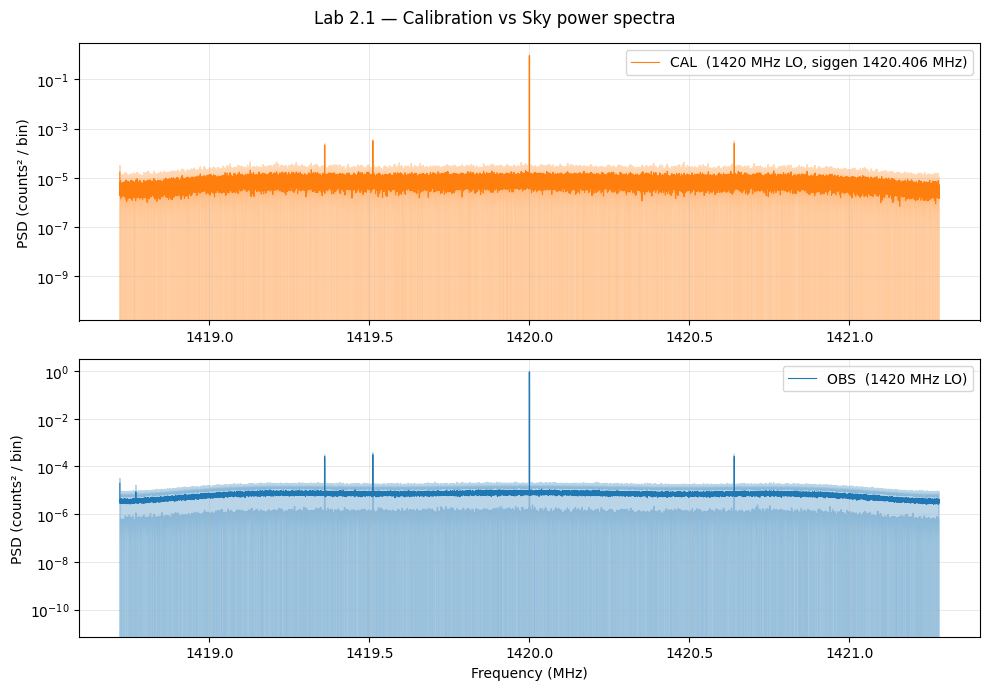

In [4]:
fig, axes = plt.subplots(2, 1, figsize=(10, 7), sharex=False)

for ax, spec, label, color in [
    (axes[0], spec_cal, f'CAL  ({rec_cal.center_freq/1e6:.0f} MHz LO, siggen {rec_cal.siggen_freq/1e6:.3f} MHz)', 'tab:orange'),
    (axes[1], spec_obs, f'OBS  ({rec_obs.center_freq/1e6:.0f} MHz LO)',                                          'tab:blue'),
]:
    ax.fill_between(spec.freqs_mhz, spec.psd - spec.std, spec.psd + spec.std,
                    color=color, alpha=0.3)
    ax.semilogy(spec.freqs_mhz, spec.psd, color=color, lw=0.8, label=label)
    ax.set_ylabel('PSD (counts² / bin)')
    ax.legend(loc='upper right')
    ax.grid(True, lw=0.4, alpha=0.5)

axes[1].set_xlabel('Frequency (MHz)')
fig.suptitle('Lab 2.1 — Calibration vs Sky power spectra')
fig.tight_layout()
plt.show()